# Datojen haku ja esikäsittely

In [1]:
from set_path import set_path
mainpath, path = set_path('areadata')

In [2]:
from read_and_prepare_data import read_and_prepare_data
stat, post, kunta_stat, vaalidata = read_and_prepare_data(path)

read_and_prepare_data  read from file
read_post_muncipalities  read from file


In [3]:
from selected_cols import selected_cols
numeric_features, categorical_features = selected_cols(largeset=True, parties=False)

In [4]:
from sklearn.feature_selection import  mutual_info_classif
import pandas as pd

from draw_and_create_clusters import create_kmeans_clusters 

from prepare_and_scale_data import prepare_and_scale_data
from create_prediction import select_kbest
from select_columns_and_clean_data import select_columns_and_clean_data

from draw_and_create_clusters import draw_pca, drawTSNE,  display_scree_plot, display_circles, display_parallel_coordinates_centroids, display_factorial_planes
from delete_outliers import delete_outliers

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the TensorBoard notebook extension
%load_ext tensorboard

pd.options.display.max_colwidth = 100




In [5]:
from create_target_columns import create_target_columns
from create_neuro_prediction import create_neuro_prediction
list_of_partiest = ['VIHR', 'KOK', 'SDP', 'KD', 'KESK', 'RKP', 'PS', 'VAS']
target_col_start = 'Äänet yhteensä lkm'
target = create_target_columns(list_of_partiest, target_col_start)

data, test, model, hist, log_path = create_neuro_prediction(stat, stat, target, mainpath, numeric_features=numeric_features, categorical_features=categorical_features, scaled=True, test_size = 0.2, Skfold=False)

Train for 60 steps, validate for 15 steps
Epoch 1/50
60/60 [==============================] - 4s 63ms/step - loss: 81362.7812 - mean_squared_error: 81335.3906 - val_loss: 105423.9316 - val_mean_squared_error: 105554.5312
Epoch 2/50
60/60 [==============================] - 1s 19ms/step - loss: 80810.5367 - mean_squared_error: 81167.0859 - val_loss: 105034.3263 - val_mean_squared_error: 105164.7578
Epoch 3/50
60/60 [==============================] - 2s 35ms/step - loss: 79866.8656 - mean_squared_error: 80465.9922 - val_loss: 103232.4044 - val_mean_squared_error: 103362.6953
Epoch 4/50
60/60 [==============================] - 1s 21ms/step - loss: 77551.1002 - mean_squared_error: 77034.0938 - val_loss: 94606.7471 - val_mean_squared_error: 94740.0078
Epoch 5/50
60/60 [==============================] - 1s 21ms/step - loss: 63534.1607 - mean_squared_error: 63987.6836 - val_loss: 70747.8486 - val_mean_squared_error: 70916.3984
Epoch 6/50
60/60 [==============================] - 1s 20ms/step - 

Epoch 47/50
60/60 [==============================] - 1s 25ms/step - loss: 25662.9564 - mean_squared_error: 25730.8340 - val_loss: 38942.3444 - val_mean_squared_error: 39096.6680
Epoch 48/50
60/60 [==============================] - 1s 24ms/step - loss: 25511.0154 - mean_squared_error: 25547.0176 - val_loss: 39570.0424 - val_mean_squared_error: 39718.3516
Epoch 49/50
60/60 [==============================] - 1s 21ms/step - loss: 25435.4569 - mean_squared_error: 25262.5156 - val_loss: 39457.2974 - val_mean_squared_error: 39606.6797
Epoch 50/50
19/19 [==============================] - 0s 8ms/step - loss: 25317.5483 - mean_squared_error: 25529.4707
{'loss': 25317.54826274671, 'mean_squared_error': 25529.47}
157.47918502366122
159.77945307869223


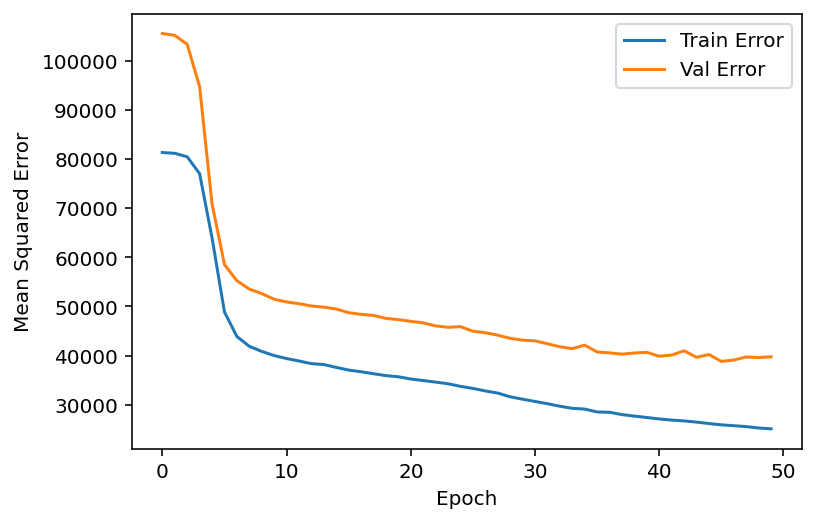

In [6]:
from create_neuro_prediction import plot_history
plot_history(hist)

In [7]:
from show_election_result import show_election_result
show_election_result(data, vaalidata, target_col_start, list_of_partiest)

VIHR  lasketut äänet: Aitotulos  354152 Laskennallinen  344923 Ennuste  342204
Laskennallisen virhe aitoon tulokseen 2.606 %
Ennusteen virhe aitoon tulokseen 3.374 %
Ennusteen virhe laskennalliseen tulokseen 0.788 %

KOK  lasketut äänet: Aitotulos  523924 Laskennallinen  514711 Ennuste  505605
Laskennallisen virhe aitoon tulokseen 1.758 %
Ennusteen virhe aitoon tulokseen 3.496 %
Ennusteen virhe laskennalliseen tulokseen 1.769 %

SDP  lasketut äänet: Aitotulos  546263 Laskennallinen  538953 Ennuste  518146
Laskennallisen virhe aitoon tulokseen 1.338 %
Ennusteen virhe aitoon tulokseen 5.147 %
Ennusteen virhe laskennalliseen tulokseen 3.861 %

KD  lasketut äänet: Aitotulos  120019 Laskennallinen  117310 Ennuste  112498
Laskennallisen virhe aitoon tulokseen 2.257 %
Ennusteen virhe aitoon tulokseen 6.266 %
Ennusteen virhe laskennalliseen tulokseen 4.102 %

KESK  lasketut äänet: Aitotulos  423511 Laskennallinen  415388 Ennuste  419019
Laskennallisen virhe aitoon tulokseen 1.918 %
Ennusteen v

In [8]:
#%tensorboard --logdir=log_path